In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import tensorflow
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
import cv2
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_tu_path="drive/My Drive/Dataset/Brain Tumor Dataset/Tumor Detection1/Training/yes/"
train_notu_path="drive/My Drive/Dataset/Brain Tumor Dataset/Tumor Detection/Training/no/"

valid_tu_path="drive/My Drive/Dataset/Brain Tumor Dataset/Tumor Detection1/Validation/yes/"
valid_notu_path="drive/My Drive/Dataset/Brain Tumor Dataset/Tumor Detection1/Validation/no/"

test_tu_path="drive/My Drive/Dataset/Brain Tumor Dataset/Tumor Detection1/Testing/yes/"
test_notu_path="drive/My Drive/Dataset/Brain Tumor Dataset/Tumor Detection1/Testing/no/"


train_tu_image=os.listdir(train_tu_path)
train_notu_image=os.listdir(train_notu_path)

valid_tu_image=os.listdir(valid_tu_path)
valid_notu_image=os.listdir(valid_notu_path)

test_tu_image=os.listdir(test_tu_path)
test_notu_image=os.listdir(test_notu_path)


print("Number of Tumor in Training= ",len(train_tu_image))
print("Number of No Tumor Images in Training= ",len(train_notu_image ))

print('\n')
print("Number of Tumor Images in Validation= ",len(valid_tu_image))
print("Number of No Tumor Images in Validation= ",len(valid_notu_image))

print('\n')
print("Number of Tumor Images in Testing= ",len(test_tu_image))
print("Number of No Tumor Images in Testing= ",len(test_notu_image))




Number of Tumor in Training=  2530
Number of No Tumor Images in Training=  493


Number of Tumor Images in Validation=  50
Number of No Tumor Images in Validation=  50


Number of Tumor Images in Testing=  50
Number of No Tumor Images in Testing=  50


In [ ]:
base_mdoel2=tf.keras.applications.InceptionResNetV2(weights='imagenet',include_top=False)
# Design new model
x=base_mdoel2.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)

preds = tf.keras.layers.Dense(2, activation = 'softmax')(x)  # This layer will have output. So It will have only two neurons
efficent_model=tf.keras.models.Model(inputs = base_mdoel2.input, outputs = preds)
opt=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
efficent_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=opt,metrics=['accuracy'])

219055592/219055592 [==============================] - 12s 0us/step


In [ ]:
for i,layer in enumerate(efficent_model.layers):
  print(i,layer.name)

In [ ]:
# set layers for training
#layer upto 780 is already trained

for layer in efficent_model.layers[:780]:
  layer.trainable=False
for layer in efficent_model.layers[780:]:
  layer.trainable=True

In [ ]:
# prepare Training data
train_generator=ImageDataGenerator()
train_data=train_generator.flow_from_directory("drive/My Drive/Dataset/Brain Tumor Dataset/Tumor Detection1/Training/",target_size=(224,224),class_mode='categorical', batch_size=32, shuffle=True)

Found 3023 images belonging to 2 classes.


In [ ]:
# prepare Validation data
valid_generator=ImageDataGenerator()
#valid_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input)
valid_data=valid_generator.flow_from_directory("drive/My Drive/Dataset/Brain Tumor Dataset/Tumor Detection1/Validation/",target_size=(224,224),class_mode='categorical',shuffle=True,batch_size=32)

Found 100 images belonging to 2 classes.


In [ ]:
# prepare Test data
test_generator=ImageDataGenerator()
test_data=valid_generator.flow_from_directory("drive/My Drive/Dataset/Brain Tumor Dataset/Tumor Detection1/Testing/",target_size=(224,224),class_mode='categorical',shuffle=True,batch_size=32)

Found 100 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'no': 0, 'yes': 1}

In [ ]:
hist=efficent_model.fit_generator(train_data, epochs=3,validation_data=valid_data)

<ipython-input-14-943b753a56ef>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=efficent_model.fit_generator(train_data, epochs=3,validation_data=valid_data)


Epoch 1/3
95/95 [==============================] - 2234s 23s/step - loss: 0.1848 - accuracy: 0.9259 - val_loss: 1.6892 - val_accuracy: 0.3100
Epoch 2/3
95/95 [==============================] - 54s 569ms/step - loss: 0.0364 - accuracy: 0.9888 - val_loss: 0.1110 - val_accuracy: 0.9600
Epoch 3/3
95/95 [==============================] - 53s 561ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.1471 - val_accuracy: 0.9200


In [ ]:
model=efficent_model.save("Inception_detection.h5")

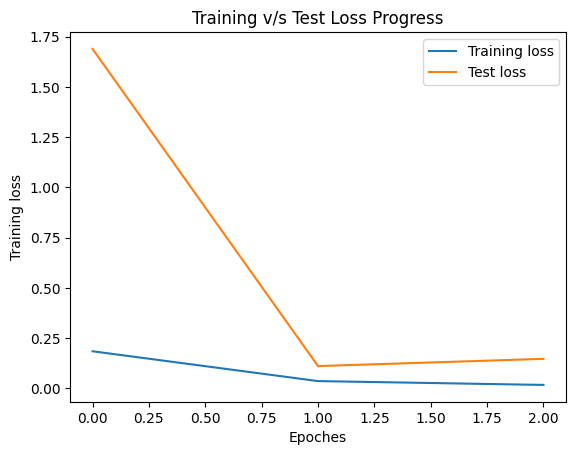

In [ ]:
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Test loss')
plt.xlabel("Epoches")
plt.ylabel("Training loss")
plt.title("Training v/s Test Loss Progress")
plt.legend()

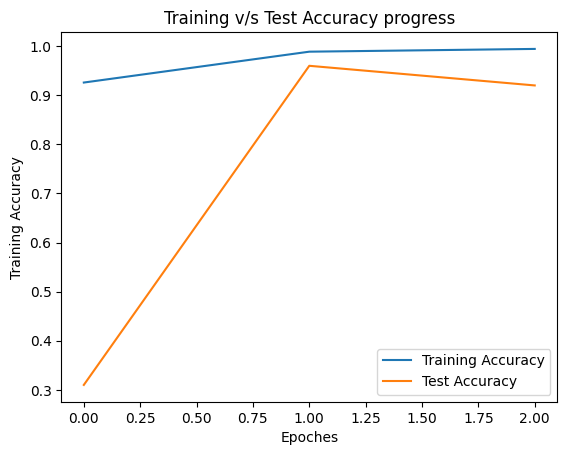

In [ ]:
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Accuracy')
plt.xlabel("Epoches")
plt.ylabel("Training Accuracy")
plt.title("Training v/s Test Accuracy progress")
plt.legend()

In [ ]:
# prepare Training data

train_generator=ImageDataGenerator()
train_data=train_generator.flow_from_directory("drive/My Drive/Dataset/Brain Tumor Dataset/Tumor Detection1/Training/",target_size=(224,224),class_mode='categorical', batch_size=32, shuffle=False)

Found 3023 images belonging to 2 classes.


In [ ]:
train_data[0]

In [ ]:
# Training Data
actual_train_class=train_data.classes
actual_valid_class=valid_data.classes
from sklearn.metrics import confusion_matrix
train_data.reset()
y_train_pred = efficent_model.predict(train_data)
y_train_pred =np.argmax(y_train_pred, axis=1)


95/95 [==============================] - 24s 219ms/step


0.9990076083360899

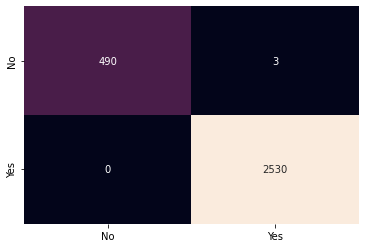

In [ ]:
cm = confusion_matrix(actual_train_class, y_train_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['No','Yes'], yticklabels=['No','Yes'],cbar=False)

from sklearn.metrics import accuracy_score, classification_report
accuracy_score(actual_train_class, y_train_pred)

In [ ]:
print(classification_report(actual_train_class, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       493
           1       1.00      1.00      1.00      2530

    accuracy                           1.00      3023
   macro avg       1.00      1.00      1.00      3023
weighted avg       1.00      1.00      1.00      3023



In [ ]:
print(efficent_model.evaluate(test_data))

4/4 [==============================] - 1s 136ms/step - loss: 0.0660 - accuracy: 0.9900
[0.06597435474395752, 0.9900000095367432]


In [ ]:
# prepare Validation data

valid_generator=ImageDataGenerator()
valid_data=valid_generator.flow_from_directory("drive/My Drive/Dataset/Brain Tumor Dataset/Tumor Detection1/Validation/",target_size=(224,224),class_mode='binary',shuffle=False,batch_size=32)

Found 100 images belonging to 2 classes.


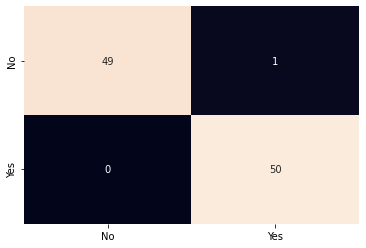

In [ ]:
# Validation Data


actual_valid_class=valid_data.classes

y_valid_pred = efficent_model.predict(valid_data)
y_valid_pred =np.argmax(y_valid_pred, axis=1)

cm = confusion_matrix(actual_valid_class, y_valid_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['No','Yes'], yticklabels=['No','Yes'],cbar=False)

In [ ]:
print(accuracy_score(actual_valid_class, y_valid_pred))
print(classification_report(actual_valid_class, y_valid_pred))

0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [ ]:
# prepare Test data

test_generator=ImageDataGenerator()
test_data=test_generator.flow_from_directory("drive/My Drive/Dataset/Brain Tumor Dataset/Tumor Detection1/Testing/",target_size=(224,224),class_mode='binary',shuffle=False,batch_size=32)

Found 100 images belonging to 2 classes.


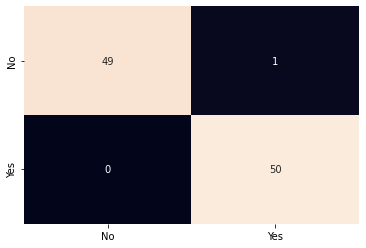

In [ ]:
# Test Data


actual_test_class=test_data.classes

y_test_pred = efficent_model.predict(test_data)
y_test_pred =np.argmax(y_test_pred, axis=1)

cm = confusion_matrix(actual_test_class, y_test_pred)
sns.heatmap(cm, annot=True,fmt='d', xticklabels=['No','Yes'], yticklabels=['No','Yes'],cbar=False)

In [ ]:
print(accuracy_score(actual_test_class, y_test_pred))
print(classification_report(actual_test_class, y_test_pred))

0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



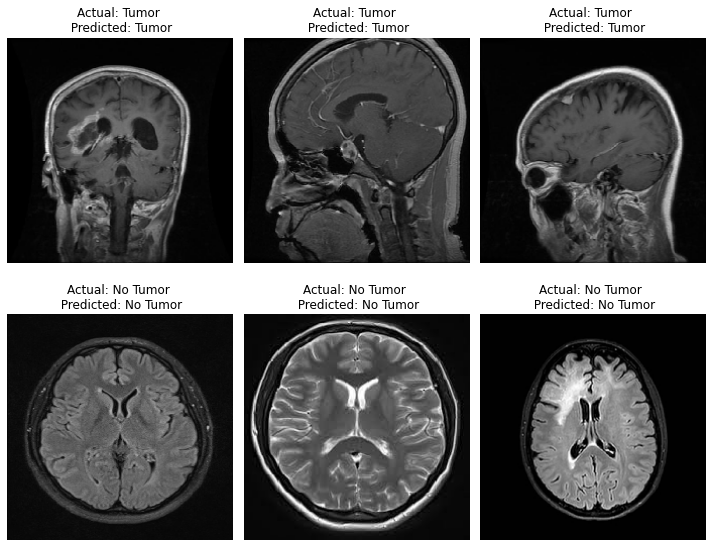

In [ ]:
# Training
from tensorflow.keras.preprocessing.image import img_to_array
fig, axes=plt.subplots(2,3, figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)

i=0
for j in train_tu_image:
  if(i<=2):
    test_img=load_img(train_tu_path+j, target_size=(224,224))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,224,224,3)
    #test_imag=tf.keras.applications.inception_resnet_v2.preprocess_input(img)
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='No Tumor'
    elif pred==1:
      result='Tumor'
    
    axes[i].set_title("Actual: Tumor \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
    
for j in train_notu_image:
  if(i>2 and i<=5):
    test_img=load_img(train_notu_path+j, target_size=(224,224))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,224,224,3)
    #test_imag=tf.keras.applications.inception_resnet_v2.preprocess_input(img)
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='No Tumor'
    elif pred==1:
      result='No Tumor'
    axes[i].set_title("Actual: No Tumor \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
  #if i==12:
  #break
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()

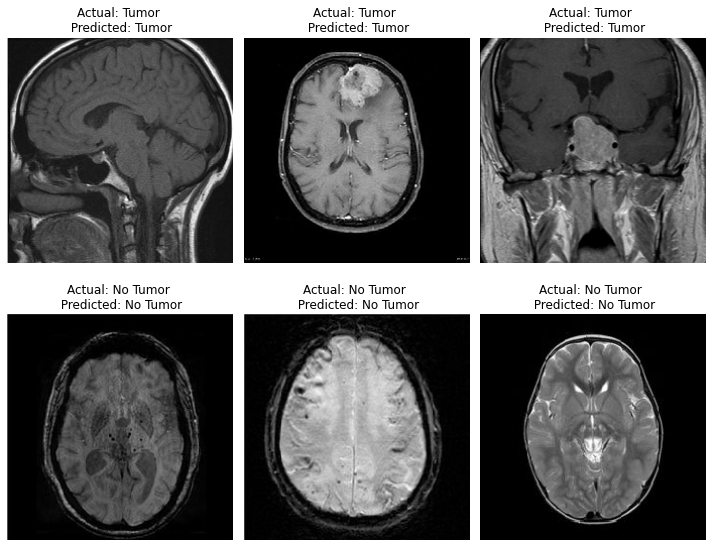

In [ ]:
# Test
from tensorflow.keras.preprocessing.image import img_to_array
fig, axes=plt.subplots(2,3, figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)

i=0
for j in test_tu_image:
  if(i<=2):
    test_img=load_img(test_tu_path+j, target_size=(224,224))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,224,224,3)
    
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='No Tumor'
    elif pred==1:
      result='Tumor'
    
    axes[i].set_title("Actual: Tumor \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
    
for j in test_notu_image:
  if(i>2 and i<=5):
    test_img=load_img(test_notu_path+j, target_size=(224,224))
    axes[i].imshow(test_img)
    test_img=img_to_array(test_img)
    test_imag= test_img.reshape(1,224,224,3)
    #test_imag=tf.keras.applications.inception_resnet_v2.preprocess_input(img)
    pred=efficent_model.predict(test_imag)
    pred= np.argmax(pred)
    if pred==0:
      result='No Tumor'
    elif pred==1:
      result='No Tumor'
    axes[i].set_title("Actual: No Tumor \n Predicted: {}".format(result))
    axes[i].axis('off')
    i=i+1
  #if i==12:
  #break
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()
fig.tight_layout()